<a href="https://colab.research.google.com/github/Muhammadhamza7/EDA_PROJECT/blob/main/Data_Science_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# **Setting styles for plots**

In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# **Upload the Dataset File**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


# **Step 2: Load the Dataset**

In [ ]:
df = pd.read_csv("netflix_titles.csv")

# **Step 3: Understand the Dataset**

In [ ]:
print("\n--- Data Information ---")
df.info()


--- Data Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
print("\n--- First 5 Rows ---")
print(df.head())


--- First 5 Rows ---
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  Sept

In [ ]:
print("\n--- Null Values ---")
print(df.isnull().sum())


--- Null Values ---
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


# **Step 4: Data Cleaning**

## **Drop columns not needed**

In [ ]:
df.drop(columns=['show_id', 'description'], inplace=True)

# **Fill missing values with placeholders**

In [ ]:
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df['duration'] = df['duration'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')


# **Convert date_added to datetime**

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# **Create new columns: year_added, month_added**

In [ ]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# **Split duration into duration_int and duration_type**

In [ ]:
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')

print("\n--- Cleaned Data Sample ---")
print(df.head())


--- Cleaned Data Sample ---
      type                  title         director  \
0    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1  TV Show          Blood & Water          Unknown   
2  TV Show              Ganglands  Julien Leclercq   
3  TV Show  Jailbirds New Orleans          Unknown   
4  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021 

# **Step 5: Univariate Analysis**

# **Content type count**

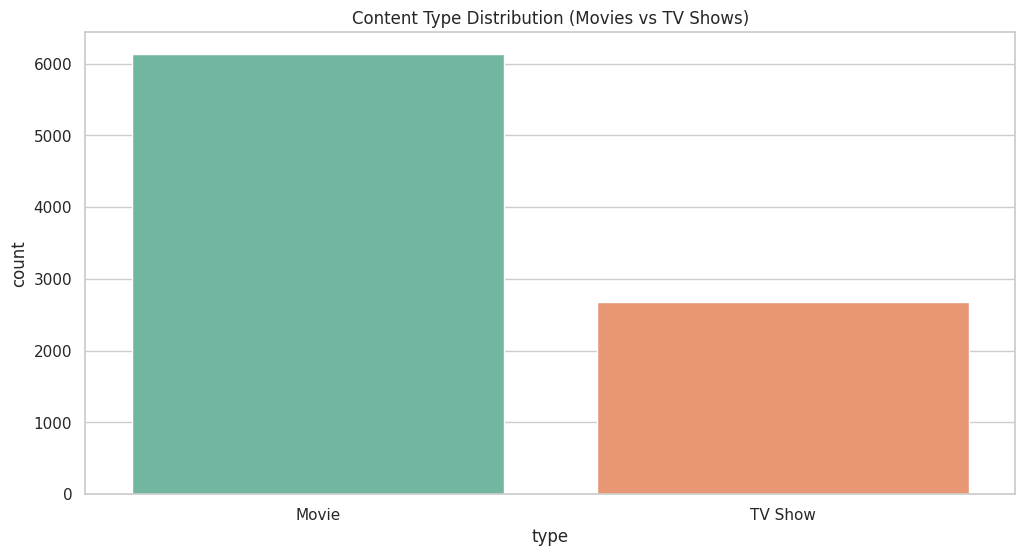

In [ ]:
sns.countplot(data=df, x='type', hue='type', palette='Set2', legend=False)
plt.title('Content Type Distribution (Movies vs TV Shows)')
plt.show()


# **Rating distribution**

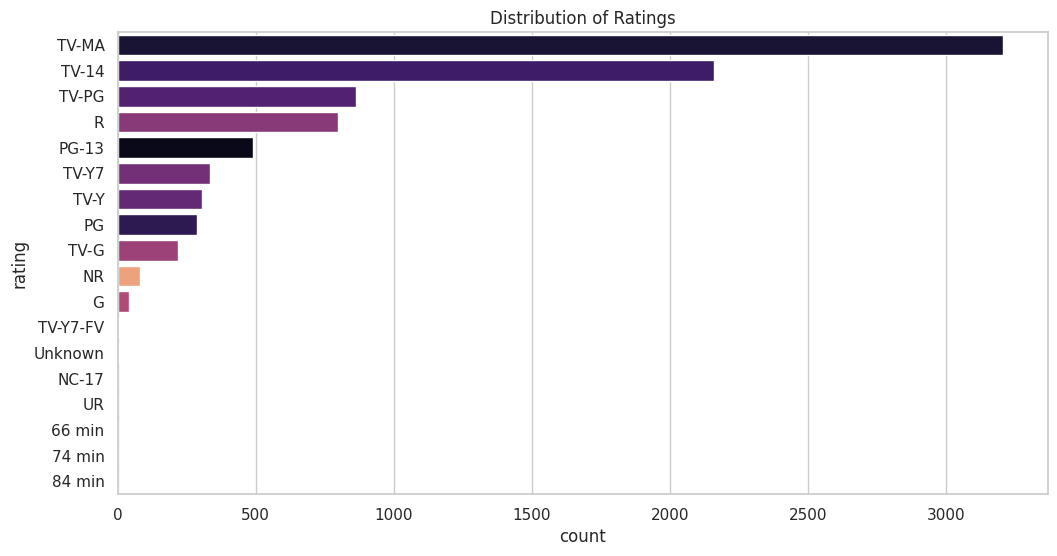

In [ ]:
sns.countplot(
    data=df,
    y='rating',
    hue='rating',
    order=df['rating'].value_counts().index,
    palette='magma',
    legend=False
)
plt.title('Distribution of Ratings')
plt.show()


# **Top 10 Genres**

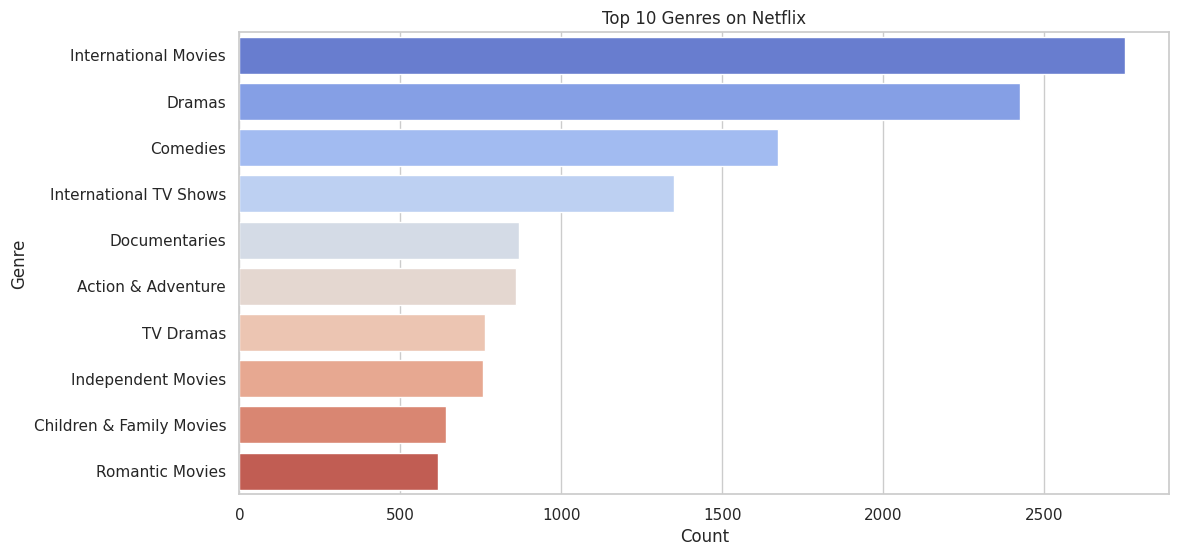

In [ ]:
genre_list = sum(df['listed_in'].str.split(', '), [])
genre_counts = pd.Series(genre_list).value_counts().head(10)

sns.barplot(
    x=genre_counts.values,
    y=genre_counts.index,
    hue=genre_counts.index,
    palette='coolwarm',
    dodge=False,
    legend=False
)

plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


# **Step 6: Bivariate Analysis**

# **Type vs Country**

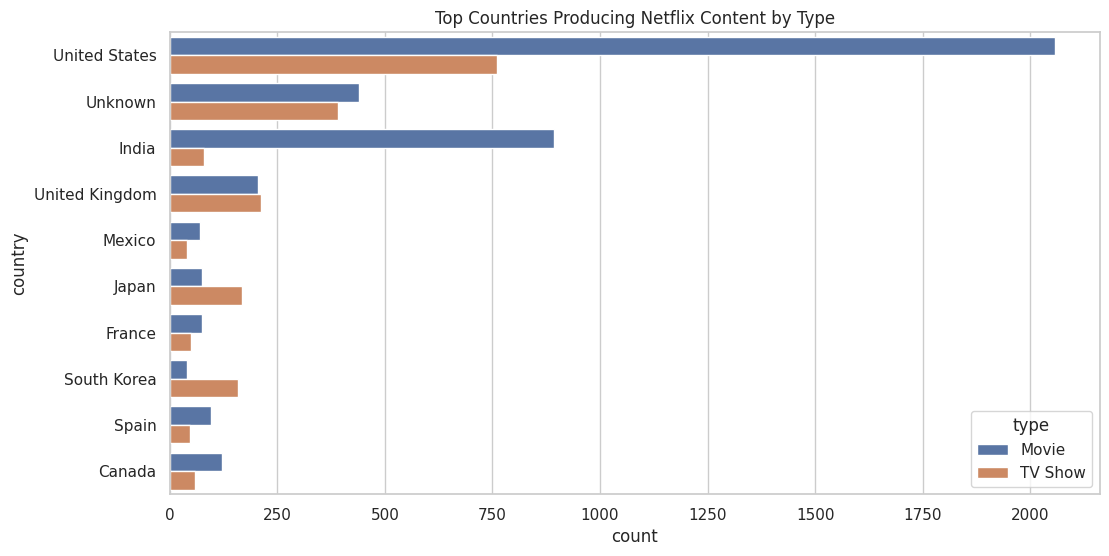

In [ ]:
top_countries = df['country'].value_counts().head(10).index
filtered_df = df[df['country'].isin(top_countries)]
sns.countplot(data=filtered_df, y='country', hue='type')
plt.title('Top Countries Producing Netflix Content by Type')
plt.show()

# **Release Year Trends**

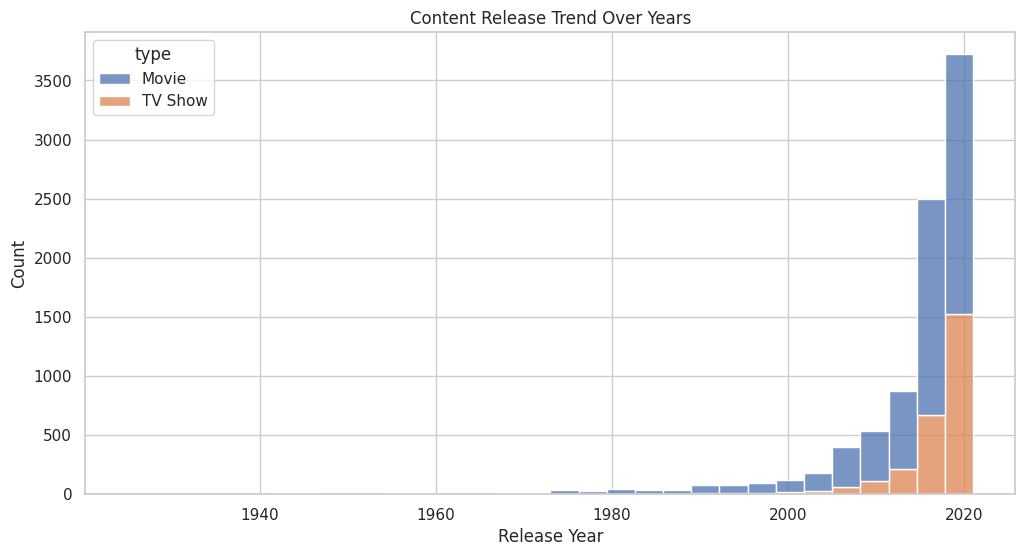

In [ ]:
sns.histplot(data=df, x='release_year', hue='type', multiple='stack', bins=30)
plt.title('Content Release Trend Over Years')
plt.xlabel('Release Year')
plt.show()

# **Duration Distribution for Movies**

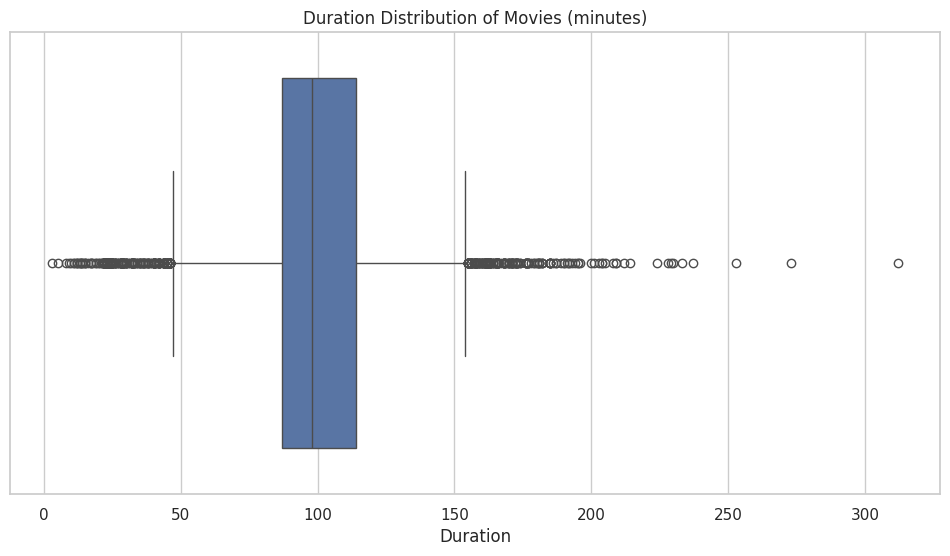

In [ ]:
sns.boxplot(data=df[df['type'] == 'Movie'], x='duration_int')
plt.title('Duration Distribution of Movies (minutes)')
plt.xlabel('Duration')
plt.show()

# **Duration Distribution for TV Shows**

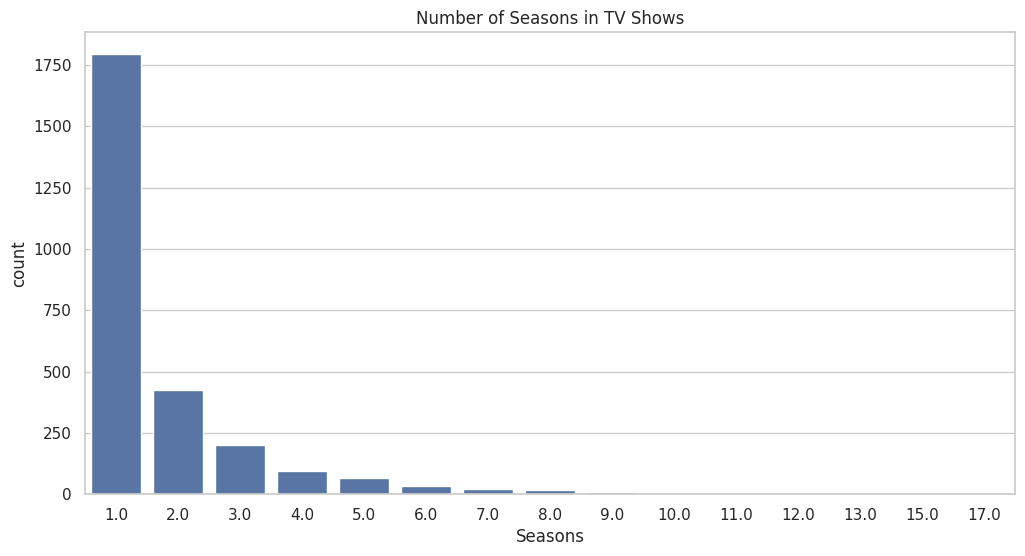

In [ ]:
sns.countplot(data=df[df['type'] == 'TV Show'], x='duration_int')
plt.title('Number of Seasons in TV Shows')
plt.xlabel('Seasons')
plt.show()

# **Step 7: Correlation Heatmap**

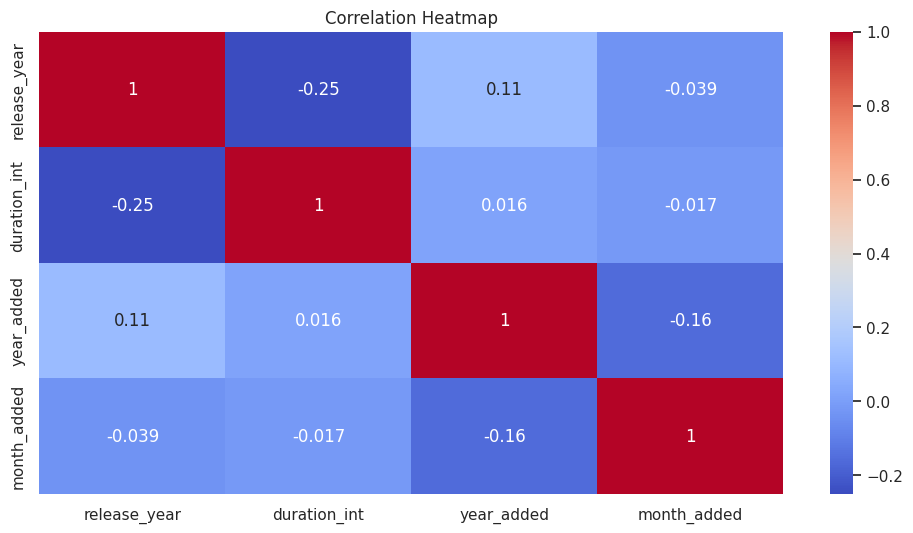

In [ ]:
sns.heatmap(df[['release_year', 'duration_int', 'year_added', 'month_added']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## **Step 08: Verification Checklist**

# **Show Null Value Check**

In [ ]:
print("\n---Final Verification Checklist ---")
print("\n✅ Null Values in Handled Columns:")
print("country:", df['country'].isnull().sum())
print("rating:", df['rating'].isnull().sum())
print("duration:", df['duration'].isnull().sum())
print("date_added:", df['date_added'].isnull().sum())
print("director:", df['director'].isnull().sum())
print("cast:", df['cast'].isnull().sum())


---Final Verification Checklist ---

✅ Null Values in Handled Columns:
country: 0
rating: 0
duration: 0
date_added: 98
director: 0
cast: 0


# **Data type verification**

In [ ]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


# **Duplicates Check**

In [ ]:
print("Data Type Checks:")
print("date_added:", df['date_added'].dtype)
print("duration_int:", df['duration_int'].dtype)
print("year_added:", df['year_added'].dtype)
print("month_added:", df['month_added'].dtype)

Data Type Checks:
date_added: datetime64[ns]
duration_int: float64
year_added: float64
month_added: float64


# **Duration Integrity**

In [ ]:
print("Nulls in Extracted Duration Columns:")
print("duration_int:", df['duration_int'].isnull().sum())
print("duration_type:", df['duration_type'].isnull().sum())

Nulls in Extracted Duration Columns:
duration_int: 3
duration_type: 0


# **Step 9: Summary Insights**

In [ ]:
print("""
SUMMARY INSIGHTS:
1. Netflix has more Movies than TV Shows.
2. The US, India, and the UK contribute the most content.
3. Dramas, International Shows, and Comedies are dominant genres.
4. Most Movies are 90-120 minutes. TV Shows have 1-2 seasons.
5. Peak content production occurred between 2018-2020.
6. Ratings like TV-MA and TV-14 are most common, suggesting a large young adult audience.
7. Content additions to Netflix peaked in 2019.
""")


SUMMARY INSIGHTS:
1. Netflix has more Movies than TV Shows.
2. The US, India, and the UK contribute the most content.
3. Dramas, International Shows, and Comedies are dominant genres.
4. Most Movies are 90-120 minutes. TV Shows have 1-2 seasons.
5. Peak content production occurred between 2018-2020.
6. Ratings like TV-MA and TV-14 are most common, suggesting a large young adult audience.
7. Content additions to Netflix peaked in 2019.

